In [2]:
%pip install minisom


  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Created wheel for minisom: filename=MiniSom-2.3.2-py3-none-any.whl size=10663 sha256=48321671f8a2a4e399a9593d9b49f51939cf06cb003c92baa901350b69e42ccb
  Stored in directory: c:\users\dathr\appdata\local\pip\cache\wheels\61\e8\de\cd2df73e85e467e1cf90ff918c6d6f388eff8e9029dae8bd78
Successfully built minisom



[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [17]:
%pip install imblearn

  Obtaining dependency information for imblearn from https://files.pythonhosted.org/packages/81/a7/4179e6ebfd654bd0eac0b9c06125b8b4c96a9d0a8ff9e9507eb2a26d2d7e/imblearn-0.0-py2.py3-none-any.whl.metadata
  Obtaining dependency information for imbalanced-learn from https://files.pythonhosted.org/packages/6e/1b/66764ecf370e797759be06fb38c11640ea1f9456ae10f8640a33cfa726ea/imbalanced_learn-0.12.2-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/258.0 kB ? eta -:--:--
   ---------------------------------------- 0.0/258.0 kB ? eta -:--:--
   - -------------------------------------- 10.2/258.0 kB ? eta -:--:--
   ---- ---------------------------------- 30.7/258.0 kB 435.7 kB/s eta 0:00:01
   ---- ---------------------------------- 30.7/258.0 kB 435.7 kB/s eta 0:00:01
   ---- ---------------------------------- 30.7/258.0 kB 435.7 kB/s eta 0:00:01
   ---- ---------------------------------- 30.7/258.0 kB 435.7 kB/s eta 0:00:01
   --------- ----------------------------- 61


[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [18]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from minisom import MiniSom
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import Isomap

In [26]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
polish_companies_bankruptcy = fetch_ucirepo(id=365) 
  
# data (as pandas dataframes) 
X = polish_companies_bankruptcy.data.features 
y = polish_companies_bankruptcy.data.targets 


In [27]:
X.head()

,year,A1,A2,A3,A4,A5,A6,A7,A8,A9,...,A55,A56,A57,A58,A59,A60,A61,A62,A63,A64
0,1,0.200550,0.37951,0.39641,2.0472,32.3510,0.38825,0.249760,1.33050,1.1389,...,348690.0,0.121960,0.39718,0.87804,0.001924,8.4160,5.1372,82.658,4.4158,7.4277
1,1,0.209120,0.49988,0.47225,1.9447,14.7860,0.00000,0.258340,0.99601,1.6996,...,2304.6,0.121300,0.42002,0.85300,0.000000,4.1486,3.2732,107.350,3.4000,60.9870
2,1,0.248660,0.69592,0.26713,1.5548,-1.1523,0.00000,0.309060,0.43695,1.3090,...,6332.7,0.241140,0.81774,0.76599,0.694840,4.9909,3.9510,134.270,2.7185,5.2078
3,1,0.081483,0.30734,0.45879,2.4928,51.9520,0.14988,0.092704,1.86610,1.0571,...,20545.0,0.054015,0.14207,0.94598,0.000000,4.5746,3.6147,86.435,4.2228,5.5497
4,1,0.187320,0.61323,0.22960,1.4063,-7.3128,0.18732,0.187320,0.63070,1.1559,...,3186.6,0.134850,0.48431,0.86515,0.124440,6.3985,4.3158,127.210,2.8692,7.8980


In [28]:
# data (as pandas dataframes) 
X = polish_companies_bankruptcy.data.features 
y = polish_companies_bankruptcy.data.targets 
# Let's take 3rd year as in the ML challenge they've asked us to analyze all the 10503 examples
X=X[X['year']==3].reset_index()
X=X.drop(columns=['index'])
y=y.iloc[17200:27703]
y=y.reset_index()
y=y.drop(columns=['index'])

In [29]:
X.head()

,year,A1,A2,A3,A4,A5,A6,A7,A8,A9,...,A55,A56,A57,A58,A59,A60,A61,A62,A63,A64
0,3,0.174190,0.41299,0.14371,1.3480,-28.9820,0.60383,0.219460,1.1225,1.1961,...,127000.0,0.163960,0.375740,0.83604,0.000007,9.7145,6.2813,84.291,4.3303,4.0341
1,3,0.146240,0.46038,0.28230,1.6294,2.5952,0.00000,0.171850,1.1721,1.6018,...,3387.8,0.027516,0.271000,0.90108,0.000000,5.9882,4.1103,102.190,3.5716,5.9500
2,3,0.000595,0.22612,0.48839,3.1599,84.8740,0.19114,0.004572,2.9881,1.0077,...,20453.0,0.007639,0.000881,0.99236,0.000000,6.7742,3.7922,64.846,5.6287,4.4581
3,3,0.024526,0.43236,0.27546,1.7833,-10.1050,0.56944,0.024526,1.3057,1.0509,...,5012.6,0.048398,0.043445,0.95160,0.142980,4.2286,5.0528,98.783,3.6950,3.4844
4,3,0.188290,0.41504,0.34231,1.9279,-58.2740,0.00000,0.233580,1.4094,1.3393,...,13730.0,0.176480,0.321880,0.82635,0.073039,2.5912,7.0756,100.540,3.6303,4.6375


In [30]:
from sklearn.impute import KNNImputer


imputer = KNNImputer(n_neighbors=5, weights="uniform")
df_imputed = pd.DataFrame(imputer.fit_transform(pd.concat([X,y],axis=1)), columns=pd.concat([X,y],axis=1).columns)
df_imputed.head()

,year,A1,A2,A3,A4,A5,A6,A7,A8,A9,...,A56,A57,A58,A59,A60,A61,A62,A63,A64,class
0,3.0,0.174190,0.41299,0.14371,1.3480,-28.9820,0.60383,0.219460,1.1225,1.1961,...,0.163960,0.375740,0.83604,0.000007,9.7145,6.2813,84.291,4.3303,4.0341,0.0
1,3.0,0.146240,0.46038,0.28230,1.6294,2.5952,0.00000,0.171850,1.1721,1.6018,...,0.027516,0.271000,0.90108,0.000000,5.9882,4.1103,102.190,3.5716,5.9500,0.0
2,3.0,0.000595,0.22612,0.48839,3.1599,84.8740,0.19114,0.004572,2.9881,1.0077,...,0.007639,0.000881,0.99236,0.000000,6.7742,3.7922,64.846,5.6287,4.4581,0.0
3,3.0,0.024526,0.43236,0.27546,1.7833,-10.1050,0.56944,0.024526,1.3057,1.0509,...,0.048398,0.043445,0.95160,0.142980,4.2286,5.0528,98.783,3.6950,3.4844,0.0
4,3.0,0.188290,0.41504,0.34231,1.9279,-58.2740,0.00000,0.233580,1.4094,1.3393,...,0.176480,0.321880,0.82635,0.073039,2.5912,7.0756,100.540,3.6303,4.6375,0.0


In [56]:
# Resampling
X=df_imputed.iloc[:,:-2]
y=df_imputed.iloc[:,-2]
smote = SMOTE()
X_res, y_res = smote.fit_resample(X, y)

# Normalize
scaler = MinMaxScaler()
X_normalized = scaler.fit_transform(X_res)

In [58]:
len(y_res)

20016

In [39]:
X_normalized

array([[0.00000000e+00, 2.53983140e-01, 8.59089302e-04, ...,
        6.86241728e-01, 2.19319113e-03, 1.87646043e-04],
       [0.00000000e+00, 2.53585807e-01, 9.57668546e-04, ...,
        6.86246977e-01, 1.80894198e-03, 2.76761816e-04],
       [0.00000000e+00, 2.51515343e-01, 4.70367982e-04, ...,
        6.86236025e-01, 2.85077527e-03, 2.07367891e-04],
       ...,
       [0.00000000e+00, 2.49574946e-01, 1.74638571e-03, ...,
        6.86279246e-01, 8.71084368e-04, 7.28407039e-05],
       [0.00000000e+00, 2.51640829e-01, 1.04066732e-03, ...,
        6.86245818e-01, 1.88177054e-03, 3.63128623e-04],
       [0.00000000e+00, 2.51481650e-01, 1.97158488e-03, ...,
        6.86258405e-01, 1.30962574e-03, 5.68635855e-04]])

In [73]:
# Initialize and train a SOM
som = MiniSom(x=20, y=20, input_len=X_normalized.shape[1], sigma=1.0, learning_rate=0.25, random_seed=41)
som.train_random(X_normalized, 1000)



"\n# Mapping each input vector to the closest node\nwinner_coordinates = np.array([som.winner(x) for x in X_normalized]).T\n\n# Plotting with class labels\nplt.figure(figsize=(10, 10))\nfor i, (x, y) in enumerate(zip(winner_coordinates[0], winner_coordinates[1])):\n    plt.scatter(x, y, color='red' if y_res[i] == 1 else 'green', alpha=0.6)\n\nplt.colorbar(label='Node Indices')\nplt.title('2D Visualization of High-Dimensional Data using SOM with Class Labels')\nplt.xlabel('SOM X')\nplt.ylabel('SOM Y')\nplt.grid(True)\nplt.show()"

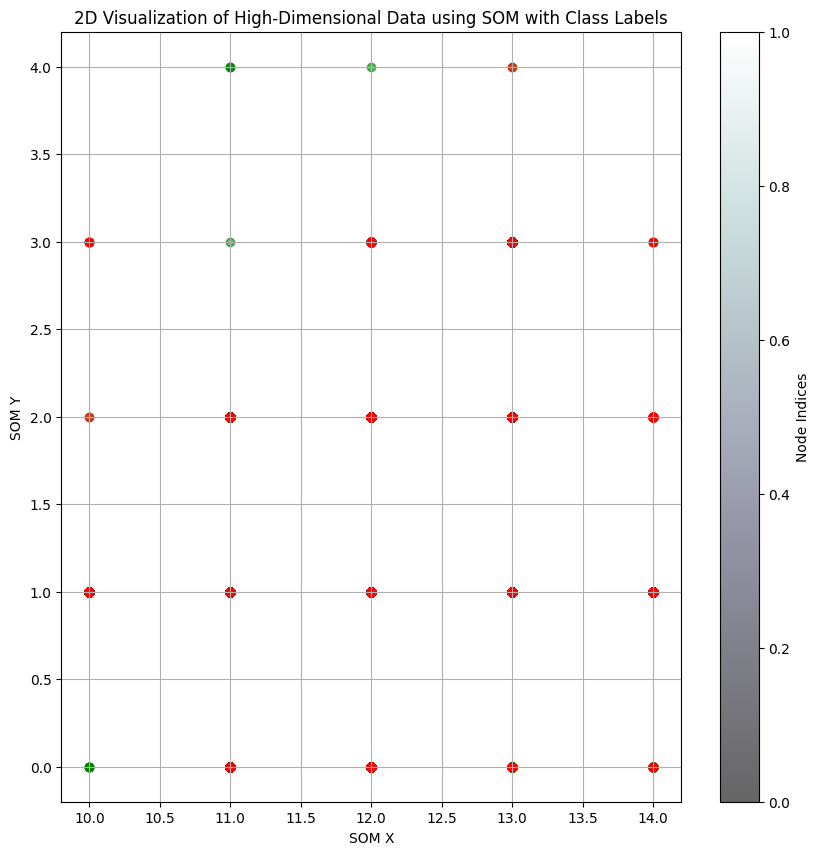

In [74]:
# Mapping each input vector to the closest node
winner_coordinates = np.array([som.winner(x) for x in X_normalized]).T

# Plotting with class labels
plt.figure(figsize=(10, 10))
for i, (x, y) in enumerate(zip(winner_coordinates[0], winner_coordinates[1])):
    plt.scatter(x, y, color='red' if y_res[i] == 1 else 'green', alpha=0.6)

plt.colorbar(label='Node Indices')
plt.title('2D Visualization of High-Dimensional Data using SOM with Class Labels')
plt.xlabel('SOM X')
plt.ylabel('SOM Y')
plt.grid(True)
plt.show()

Observation: The SOM visualization reveals distinct clustering patterns with green points (class 0) primarily located on the lower and upper extremes of the grid, while red points (class 1) are predominantly centralized and spread uniformly. This plot shows that SOM could be better in mapping out the feature space and providing a better visual to show two classes in the dataset. 

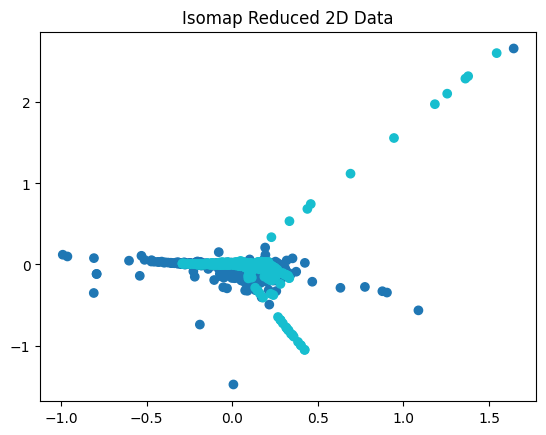

In [81]:

# Implement isomap to visalize higher dimenisonal features in 2D space
 

 
# Apply Isomap
isomap = Isomap(n_neighbors=30, n_components=2)
isomap_1 = isomap.fit_transform(X_normalized)
 
# Plot the reduced-dimensional data
 
plt.scatter(isomap_1[:, 0],isomap_1[:, 1], c=y_res, cmap=plt.cm.tab10)
plt.title('Isomap Reduced 2D Data')
 
plt.show()